<a href="https://colab.research.google.com/github/stephanyresque/Ciencia-de-dados-2/blob/main/20_21_11_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
empresas = {
    "Exxon Mobil": 1,
    "JP Morgan Chase": 1,
    "General Electric": 1,
    "Royal Dutch Shell": 2,
    "ICBC": 3,
    "HSBC Holdings": 4,
    "PetroChina": 3,
    "Berkshire Hathaway": 1,
    "Wells Fargo": 1,
    "Petrobras": 5,
}

paises = {
    1: "Estados Unidos",
    2: "Holanda",
    3: "China",
    4: "Reino Unido",
    5: "Brasil",
}

In [3]:
df_empresas = pd.DataFrame(empresas.items(), columns = ['empresa', 'codigo_pais'])

df_empresas

,empresa,codigo_pais
0,Exxon Mobil,1
1,JP Morgan Chase,1
2,General Electric,1
3,Royal Dutch Shell,2
4,ICBC,3
5,HSBC Holdings,4
6,PetroChina,3
7,Berkshire Hathaway,1
8,Wells Fargo,1
9,Petrobras,5


In [4]:
df_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   empresa      10 non-null     object
 1   codigo_pais  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [5]:
df_empresas.describe() #não faz sentido o describe nesse sentido -> variável qualitativa nominal

,codigo_pais
count,10.00000
mean,2.20000
std,1.47573
min,1.00000
25%,1.00000
50%,1.50000
75%,3.00000
max,5.00000


In [6]:
df_empresas['codigo_pais'].value_counts() #isso faz sentido

,count
codigo_pais,
1,5
3,2
2,1
4,1
5,1


In [7]:
df_empresas['codigo_pais'] = df_empresas['codigo_pais'].astype('category')

df_empresas

,empresa,codigo_pais
0,Exxon Mobil,1
1,JP Morgan Chase,1
2,General Electric,1
3,Royal Dutch Shell,2
4,ICBC,3
5,HSBC Holdings,4
6,PetroChina,3
7,Berkshire Hathaway,1
8,Wells Fargo,1
9,Petrobras,5


In [8]:
df_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   empresa      10 non-null     object  
 1   codigo_pais  10 non-null     category
dtypes: category(1), object(1)
memory usage: 430.0+ bytes


In [9]:
df_empresas.describe()

,empresa,codigo_pais
count,10,10
unique,10,5
top,Exxon Mobil,1
freq,1,5


In [10]:
df_empresas['codigo_pais'].cat.categories

Index([1, 2, 3, 4, 5], dtype='int64')

In [11]:
df_empresas['codigo_pais'].cat.codes

,0
0,0
1,0
2,0
3,1
4,2
5,3
6,2
7,0
8,0
9,4


In [12]:
df_empresas['codigo_pais'].cat.ordered

False

In [13]:
df_paises = pd.DataFrame(paises.items(), columns = ['codigo', 'pais'])

df_paises

,codigo,pais
0,1,Estados Unidos
1,2,Holanda
2,3,China
3,4,Reino Unido
4,5,Brasil


In [14]:
df_empresas

,empresa,codigo_pais
0,Exxon Mobil,1
1,JP Morgan Chase,1
2,General Electric,1
3,Royal Dutch Shell,2
4,ICBC,3
5,HSBC Holdings,4
6,PetroChina,3
7,Berkshire Hathaway,1
8,Wells Fargo,1
9,Petrobras,5


In [15]:
df_empresas.merge(df_paises, left_on='codigo_pais', right_on='codigo')

,empresa,codigo_pais,codigo,pais
0,Exxon Mobil,1,1,Estados Unidos
1,JP Morgan Chase,1,1,Estados Unidos
2,General Electric,1,1,Estados Unidos
3,Royal Dutch Shell,2,2,Holanda
4,ICBC,3,3,China
5,HSBC Holdings,4,4,Reino Unido
6,PetroChina,3,3,China
7,Berkshire Hathaway,1,1,Estados Unidos
8,Wells Fargo,1,1,Estados Unidos
9,Petrobras,5,5,Brasil


In [16]:
df_empresas.merge(df_paises, left_on='codigo_pais', right_on='codigo').drop(columns = ['codigo_pais', 'codigo'])

,empresa,pais
0,Exxon Mobil,Estados Unidos
1,JP Morgan Chase,Estados Unidos
2,General Electric,Estados Unidos
3,Royal Dutch Shell,Holanda
4,ICBC,China
5,HSBC Holdings,Reino Unido
6,PetroChina,China
7,Berkshire Hathaway,Estados Unidos
8,Wells Fargo,Estados Unidos
9,Petrobras,Brasil


In [18]:
df = df_empresas.merge(df_paises, left_on='codigo_pais', right_on='codigo').drop(columns = ['codigo_pais', 'codigo'])

df

,empresa,pais
0,Exxon Mobil,Estados Unidos
1,JP Morgan Chase,Estados Unidos
2,General Electric,Estados Unidos
3,Royal Dutch Shell,Holanda
4,ICBC,China
5,HSBC Holdings,Reino Unido
6,PetroChina,China
7,Berkshire Hathaway,Estados Unidos
8,Wells Fargo,Estados Unidos
9,Petrobras,Brasil


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   empresa  10 non-null     object
 1   pais     10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [20]:
df.describe()

,empresa,pais
count,10,10
unique,10,5
top,Exxon Mobil,Estados Unidos
freq,1,5


In [22]:
df['pais'] = df['pais'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   empresa  10 non-null     object  
 1   pais     10 non-null     category
dtypes: category(1), object(1)
memory usage: 430.0+ bytes


In [23]:
df['pais'].cat.ordered

False

In [24]:
df['pais'].value_counts()

,count
pais,
Estados Unidos,5
China,2
Brasil,1
Holanda,1
Reino Unido,1


<Axes: xlabel='pais'>

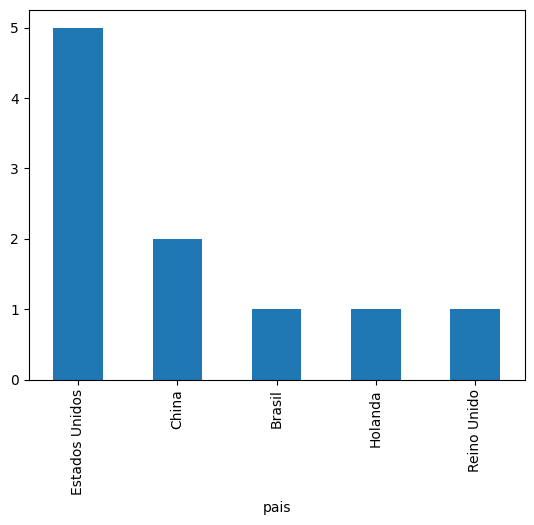

In [25]:
df['pais'].value_counts().plot(kind= 'bar')